In [2]:
import calculator_utils as utils
import pandas as pd
import datetime

In [3]:
demo_start_time = 1177632000 #Friday, April 27, 2007 12:00:00 AM
demo_lat = '44.2' #John day river csv
demo_lon = '-119.6'
demo_appid = ''

current_timestamps = utils.make_list_of_unix_timestamps(unix_start=demo_start_time, periods=100, freq='H')

In [ ]:
#sanity check, get 100 timestamps from the start time, print them as unpix tie and as DateTime
for timestamp in current_timestamps:
    print(f"{timestamp} : {datetime.datetime.fromtimestamp(timestamp)}")

In [ ]:
df_list = []
for timestamp in (current_timestamps):
    #get a dataframe for each timestamp
    df = utils.call_onecall_timemachine(lat=demo_lat,
                                        lon=demo_lon,
                                        dt=timestamp,
                                        appid=demo_appid)
    #append it to the list
    df_list.append(df)
#concatenate all the dataframes in the list into one big dataframe
big_df = pd.DataFrame()
big_df = pd.concat(df_list, ignore_index=True)
#save the big dataframe to a csv file
big_df.to_csv('demo.csv')

In [5]:
history_df = pd.read_csv('JOHN_DAY_RIVER_44_2_-119_6_654d846a05a8170008d9bef7.csv')
big_df = pd.read_csv('demo.csv')

In [6]:
#merge 2 dataframes on a dt collumn
merged_df = pd.merge(history_df, big_df, on='dt', suffixes=('_hist', '_api'))

In [7]:
#test temp. pressure, humidity, dew_point, clouds, 
merged_df['temp_diff'] = merged_df['temp_hist'] - merged_df['temp_api']
merged_df['temp_diff_abs'] = abs(merged_df['temp_diff'])

merged_df['pressure_diff'] = merged_df['pressure_hist'] - merged_df['pressure_api']
merged_df['pressure_diff_abs'] = abs(merged_df['pressure_diff'])

merged_df['humidity_diff'] = merged_df['humidity_hist'] - merged_df['humidity_api']
merged_df['humidity_diff_abs'] = abs(merged_df['humidity_diff'])

merged_df['dew_point_diff'] = merged_df['dew_point_hist'] - merged_df['dew_point_api']
merged_df['dew_point_diff_abs'] = abs(merged_df['dew_point_diff'])

merged_df['clouds_diff'] = merged_df['clouds_all'] - merged_df['clouds']
merged_df['clouds_diff_abs'] = abs(merged_df['clouds_diff'])


In [8]:
important_columns = ['dt', 'temp_hist', 'temp_api', 'temp_diff', 'temp_diff_abs', 'pressure_hist', 'pressure_api', 'pressure_diff', 'pressure_diff_abs', 'humidity_hist', 'humidity_api', 'humidity_diff', 'humidity_diff_abs', 'dew_point_hist', 'dew_point_api', 'dew_point_diff', 'dew_point_diff_abs', 'clouds_all', 'clouds', 'clouds_diff', 'clouds_diff_abs']
truncated_df = merged_df[important_columns]

In [ ]:
import matplotlib.pyplot as plt

for column in ['temp_diff', 'temp_diff_abs', 'pressure_diff', 'pressure_diff_abs', 'humidity_diff', 'humidity_diff_abs', 'dew_point_diff', 'dew_point_diff_abs', 'clouds_diff', 'clouds_diff_abs']:
    mean = truncated_df[column].mean()
    var = truncated_df[column].var()
    print(f"{column} mean: {mean}")
    print(f"{column} variance: {var}")
    
    truncated_df[column].hist()
    plt.xlabel('difference')
    plt.ylabel('num occurances')
    plt.title(f'Histogram of {column}')
    plt.show()

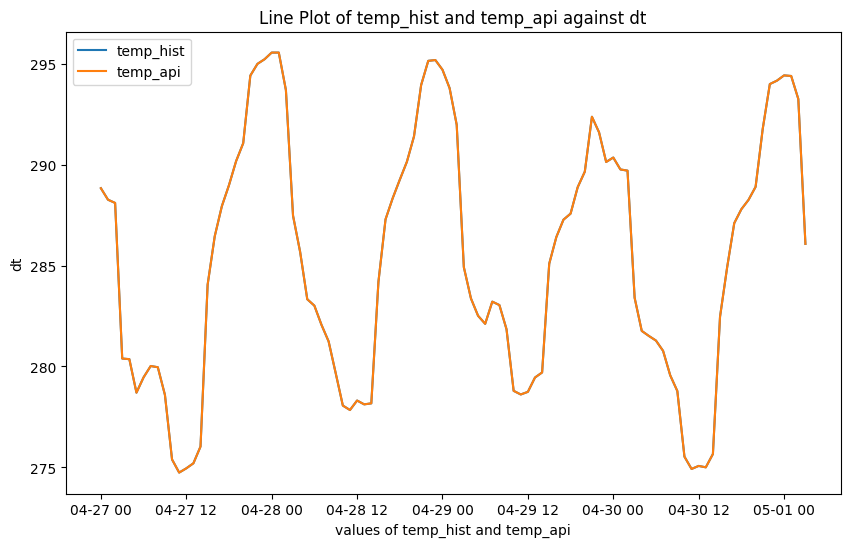

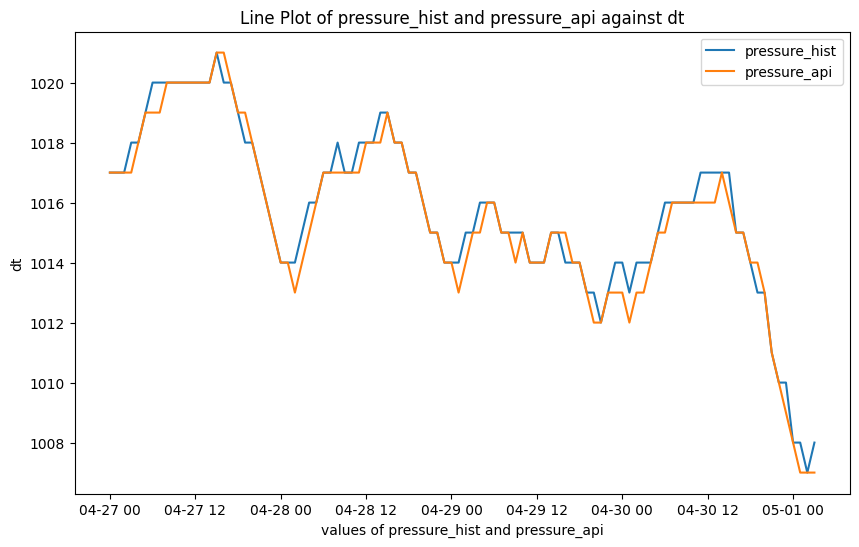

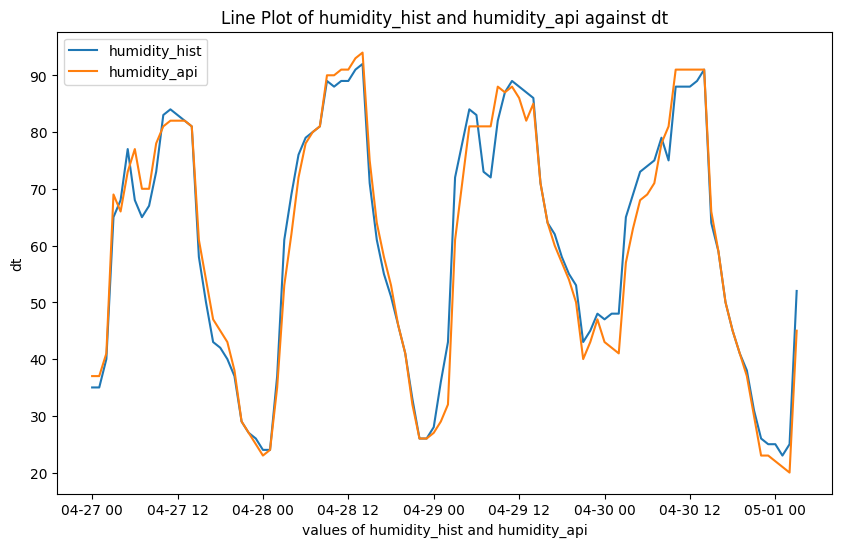

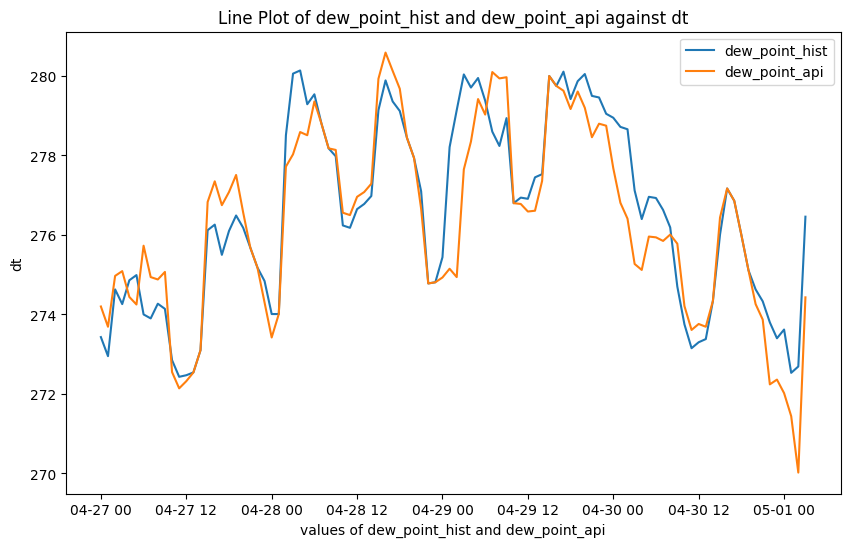

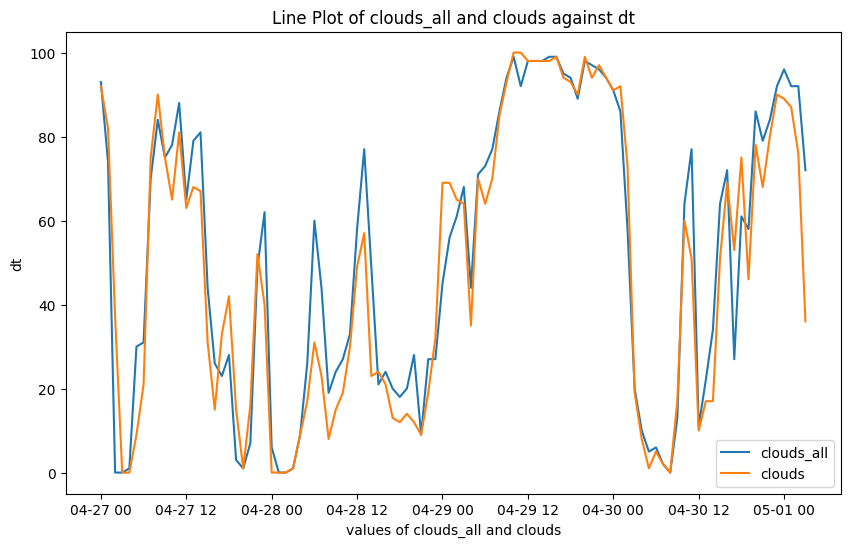

In [16]:

for combo in [['temp_hist', 'temp_api'], ['pressure_hist', 'pressure_api'], ['humidity_hist', 'humidity_api'], ['dew_point_hist', 'dew_point_api'], ['clouds_all', 'clouds']]:
    # Plotting the two specified columns against 'dt'

    plt.figure(figsize=(10, 6))
    plt.plot(pd.to_datetime(truncated_df['dt'], unit='s'), truncated_df[combo[0]], label=combo[0])
    plt.plot(pd.to_datetime(truncated_df['dt'], unit='s'), truncated_df[combo[1]], label=combo[1])

    # Add labels and title for clarity
    plt.xlabel(f'values of {combo[0]} and {combo[1]}')
    plt.ylabel('dt')
    plt.title(f'Line Plot of {combo[0]} and {combo[1]} against dt')

    # Display a legend
    plt.legend()

    # Display the plot
    plt.show()